<a href="https://colab.research.google.com/github/Reeshabh45/yolov8-Detection/blob/main/trafficsigns_detection_using_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> <span style='color:#e61227'>|</span> Traffic Signs Detection Using YOLOv8 </b>

## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install Essential Libraries
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.2/699.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:#e61227'>|</span> Dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Show Original Images Before Detect </b></p>
</div>

***3.1.1. Show Some Images From TrainSet***

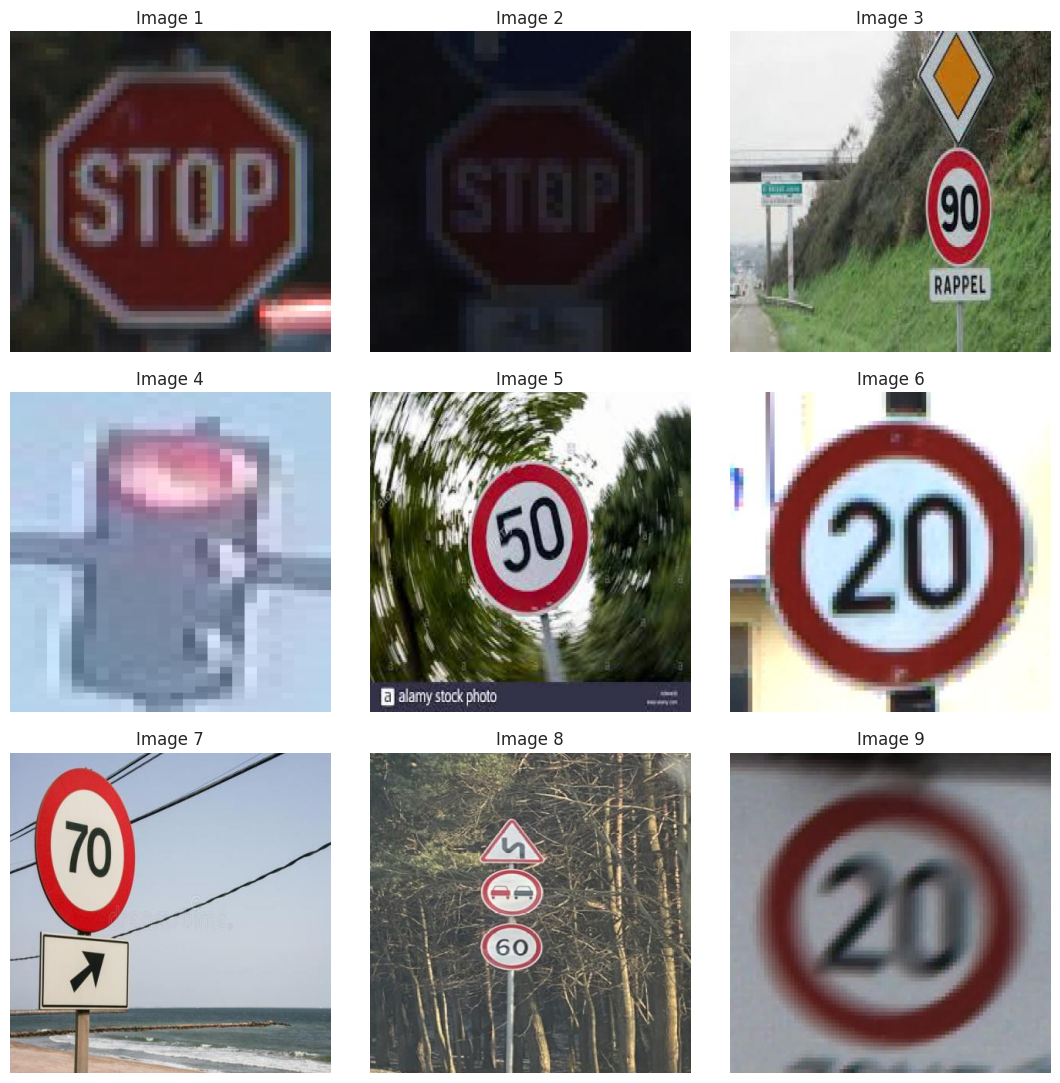

In [ ]:
Image_dir = '/content/drive/MyDrive/traffic/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

***3.1.2. Get Shape Of An Image For Using In Training Step***

In [ ]:
# Get the size of the image
image = cv2.imread("/content/drive/MyDrive/traffic/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


## <b>4 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs  </b>

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.0MB/s]



WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/traffic/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 8.4ms
Speed: 4.8ms preprocess, 8.4ms inference, 914.6ms postprocess per image at shape (1, 3, 416, 416)


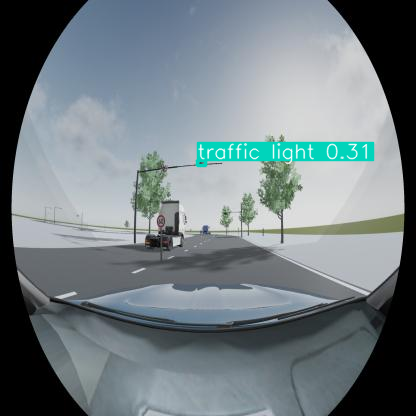

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/drive/MyDrive/traffic/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

***5.1.1. Training Step***

In [ ]:
# # Build from YAML and transfer weights
# Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# # Training The Final Model
# Result_Final_model = Final_model.train(data="/content/drive/MyDrive/traffic/train/images/data.yaml",epochs=15, imgsz = 416, batch = 64 ,
#                                        lr0=0.0001, dropout= 0.15, device = 0)
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/traffic/data.yaml",epochs=15, imgsz = 416,
                                       batch = 64 ,
                                       lr0=0.0001, dropout= 0.15, device = 0)

In [ ]:
Final_model

***5.1.2. Validation Step***

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

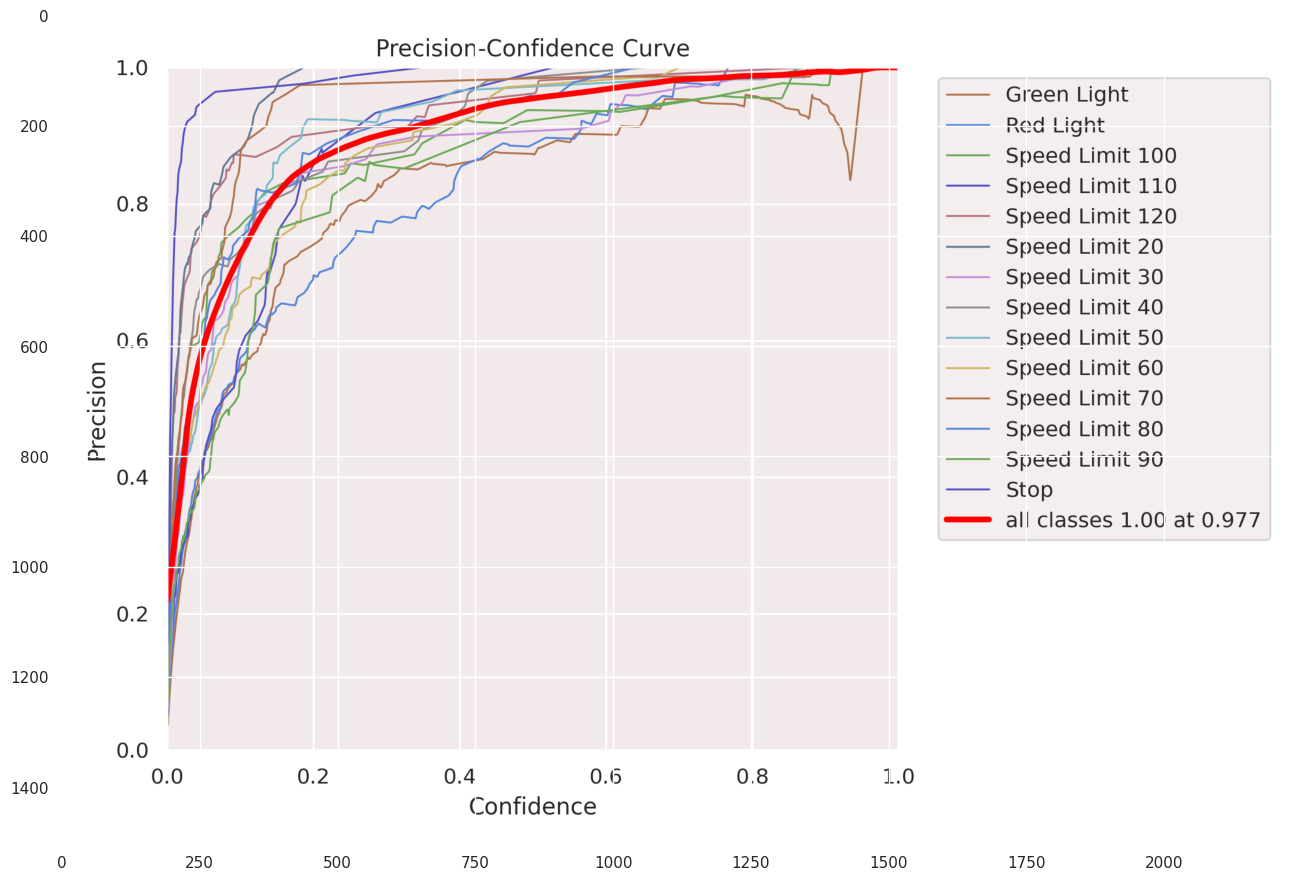

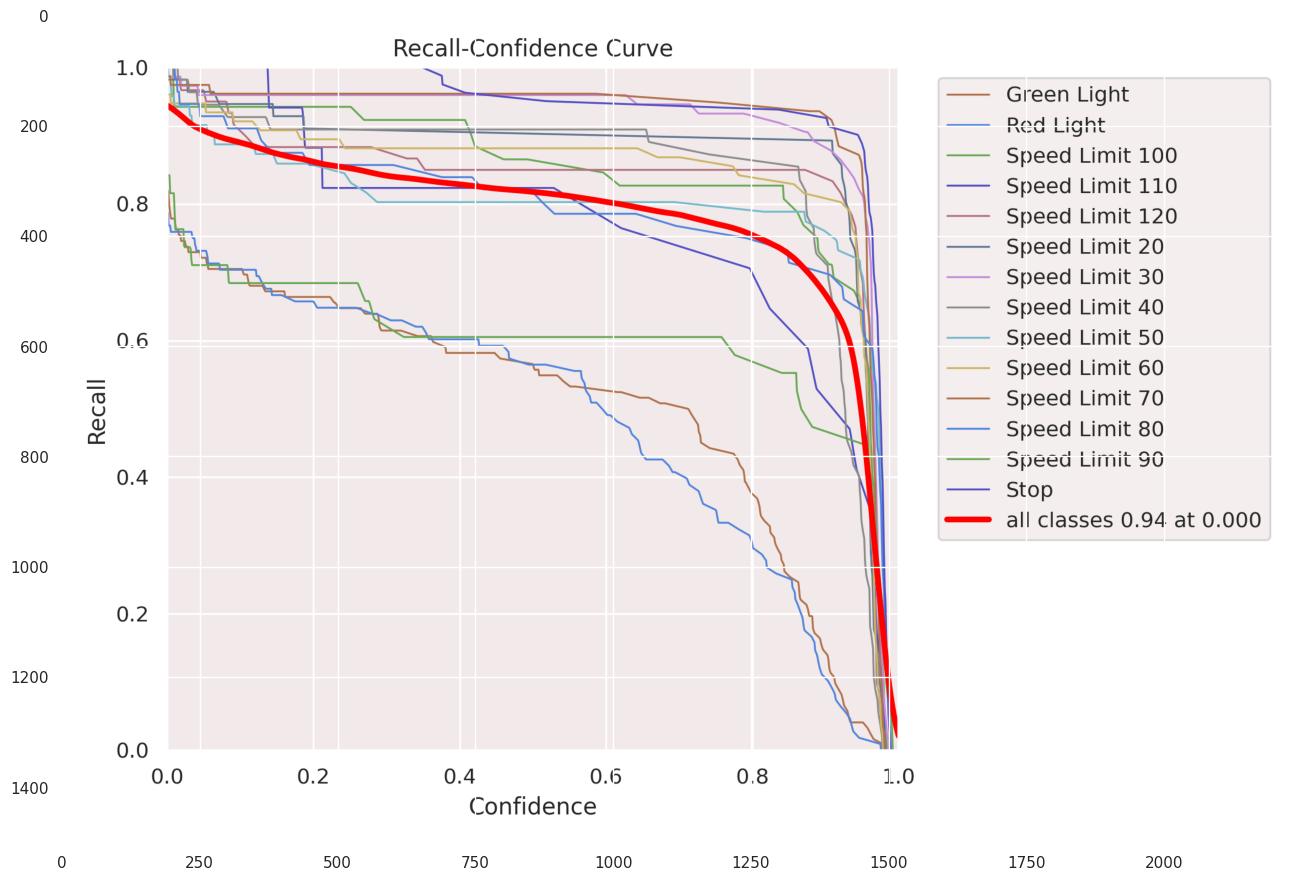

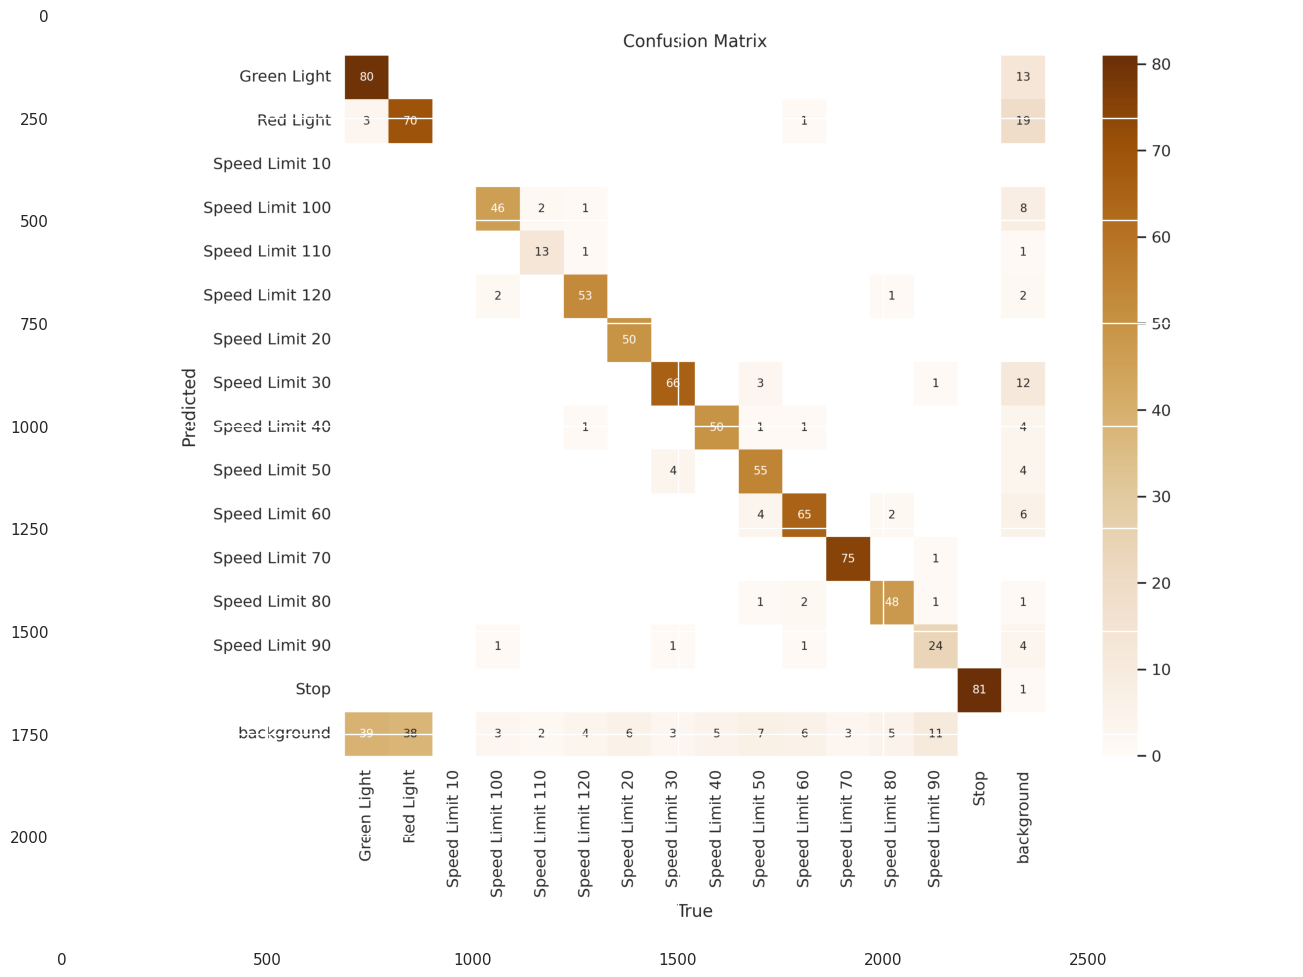

In [ ]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
5                         6                  0.64007                  1.36750   
6                         7                  0.62305                  1.12390   
7                         8                  0.60299                  0.96117   
8                         9                  0.58622                  0.83525   
9                        10                  0.56834                  0.78301   
10                       11                  0.55371                  0.70125   
11                       12                  0.54347                  0.63514   
12                       13                  0.53259                  0.58933   
13                       14                  0.52132                  0.56425   
14                       15                  0.50912                  0.52512   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
5                   0.92533                  0.68079                  0.62448   
6                   0.91649                  0.75271                  0.69738   
7                   0.90743                  0.88819                  0.73265   
8                   0.89945                  0.87436                  0.75194   
9                   0.88966                  0.89317                  0.77989   
10                  0.88545                  0.86399                  0.80636   
11                  0.88596                  0.93137                  0.79914   
12                  0.87741                  0.91728                  0.81882   
13                  0.87142                  0.94803                  0.82004   
14                  0.86643                  0.95240                  0.81954   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
5                   0.68895                  0.58188                  0.65337   
6                   0.75803                  0.63478                  0.63499   
7                   0.83011                  0.71140                  0.60269   
8                   0.84892                  0.73020                  0.58112   
9                   0.85819                  0.73152                  0.58355   
10                  0.86326                  0.73965                  0.56547   
11                  0.88496                  0.76267                  0.55481   
12                  0.88493                  0.76640                  0.55355   
13                  0.89830                  0.77885                  0.53272   
14                  0.90273                  0.78577                  0.52690   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
5                   1.32330                  0.94013                 0.000387   
6                   1.07050                  0.92035                 0.000352   
7                   0.76935                  0.90633                 0.000318   
8                   0.70606                  0.89569                 0.000283   
9                   0.58659                  0.89078                 0.000248   
10                  0.56899                  0.88704                 0.000214   
11                  0.51909                  0.88043                 0.000179   
12                  0.48526                  0.88102                 0.000144   
13                  0.44233                  0.87123                 0.000109   
14                  0.40900                  0.87096                 0.000075   

                     lr/pg1                   lr/pg2  
5                  0.000387                 0.000387  
6                  0.000352                 0.000352  
7                  0.000318                 0.000318  
8                  0.000283                 0.000283  
9                  0.000248                 0.000248  
10                 0.000214                 0.000214  
11                 0.000179                 0.000179  
12            

In [ ]:
# Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
# Result_Final_model.tail(10)

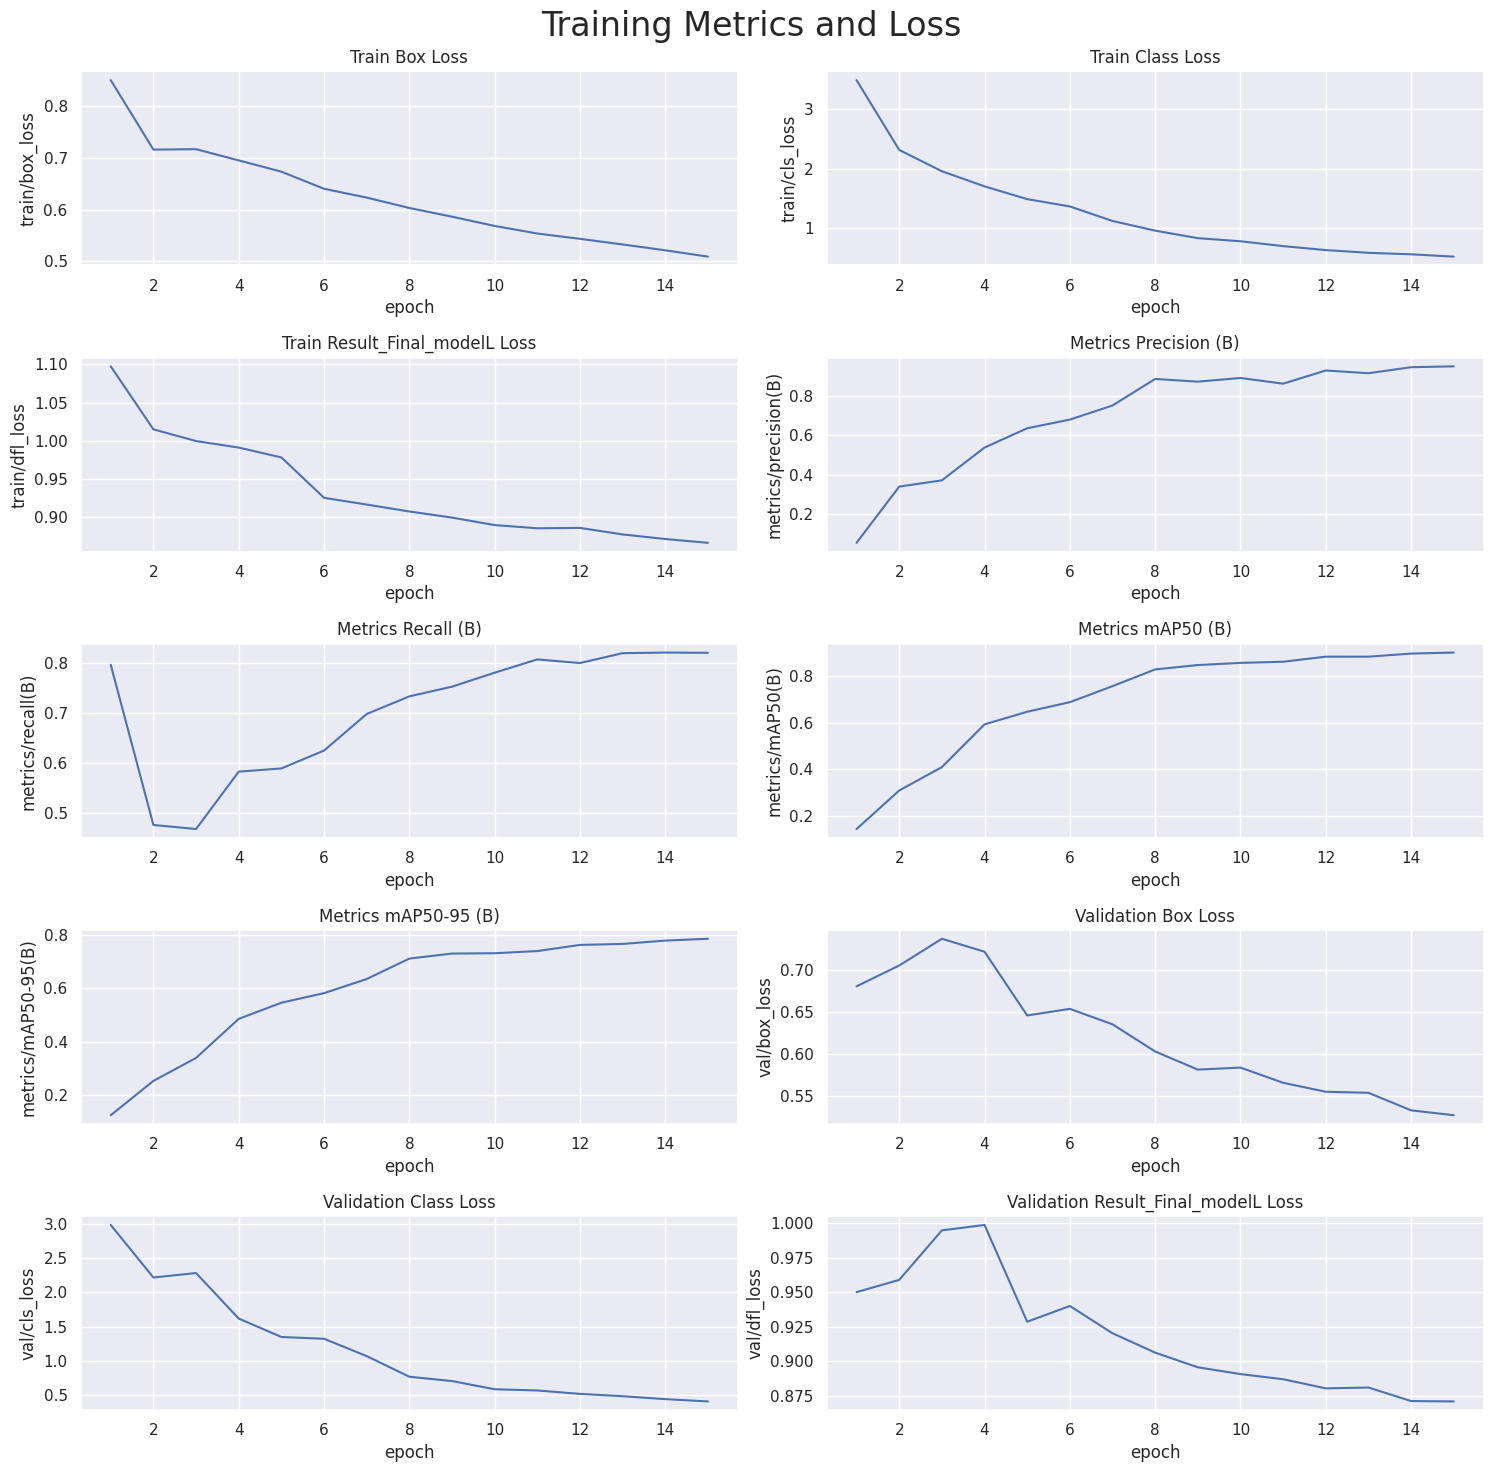

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metrics_subplots(dataframe, columns, nrows, ncols, figsize=(15, 15), suptitle='Training Metrics and Loss'):
    dataframe.columns = dataframe.columns.str.strip()

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    for i in range(nrows):
        for j in range(ncols):
            sns.lineplot(x='epoch', y=columns[i * ncols + j], data=dataframe, ax=axs[i, j])
            axs[i, j].set(title=columns[i * ncols + j])

    plt.suptitle(suptitle, fontsize=24)
    plt.subplots_adjust(top=0.8)
    plt.tight_layout()
    plt.show()
columns_to_plot = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
    'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss'
]
plot_metrics_subplots(Result_Final_model, columns_to_plot, nrows=5, ncols=2)


In [ ]:
Result_Final_model

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.2 |</span></b> Validation of the Model By TestSet </b></p>
</div>

In [ ]:
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/traffic/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [02:56<00:00,  3.61it/s]


val: New cache created: /content/drive/MyDrive/traffic/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.36it/s]


                   all        638        770      0.783      0.797      0.857      0.735
           Green Light        638        110       0.78      0.691      0.771      0.448
             Red Light        638         94      0.712      0.649      0.671      0.423
        Speed Limit 10        638          3        0.4      0.333      0.597      0.418
       Speed Limit 100        638         46      0.762      0.848        0.9      0.796
       Speed Limit 110        638         21      0.888      0.757      0.773      0.686
       Speed Limit 120        638         44      0.811      0.955      0.975      0.891
        Speed Limit 20        638         46      0.924      0.935      0.966      0.877
        Speed Limit 30        638         60      0.738      0.867      0.886      0.827
        Speed Limit 40        638         53      0.832      0.943      0.973      0.849
        Speed Limit 50        638         50      0.696       0.76       0.82      0.752
        Speed Limit 6

In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.782511688474316
metrics/recall(B):  0.797476048817171
metrics/mAP50(B):  0.8573489538151419
metrics/mAP50-95(B):  0.7345798988085552


**Tip: Based on the observed results, it is evident that the accuracy of the model on both the validation and test data sets exhibits a high degree of similarity. This outcome serves as an indication that the model has been appropriately trained.**

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.3 |</span></b> Making Predictions On Test Images </b></p>
</div>

In [ ]:
image_dir = '/content/drive/MyDrive/traffic/test/images'

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Speed Limit 60, 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Speed Limit 120, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Speed Limit 40, 1 Stop, 13.7ms
Speed: 2.2ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Speed Limit 60, 8.8ms
Speed: 0.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Speed Limit 90, 10.0ms
Speed: 1.2ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Speed Limit 40, 10.3ms
Speed: 1.2ms preprocess, 10.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results s

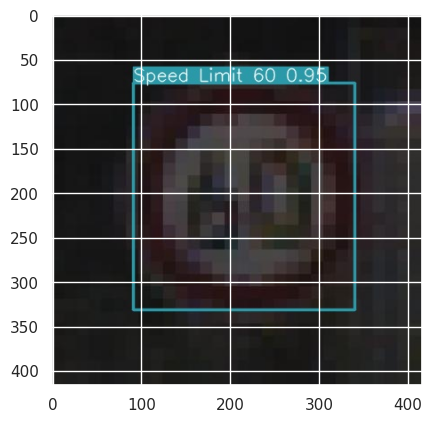

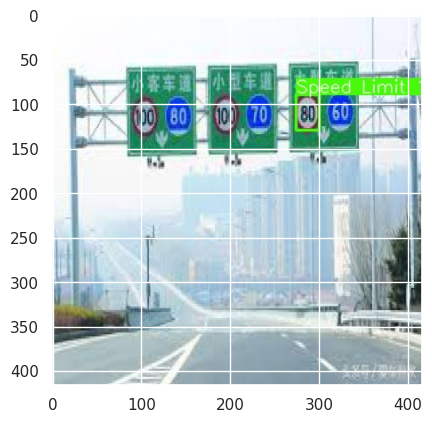

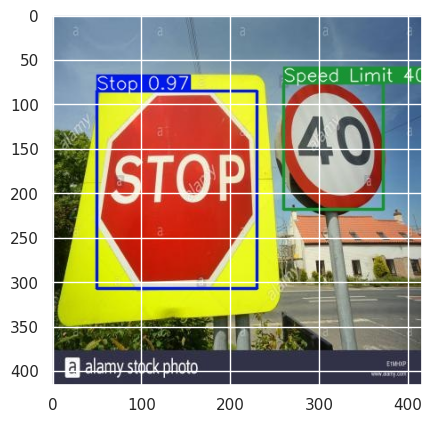

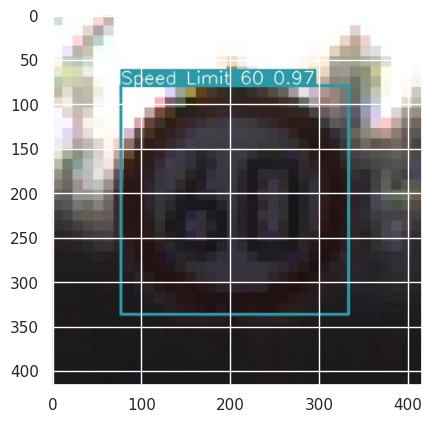

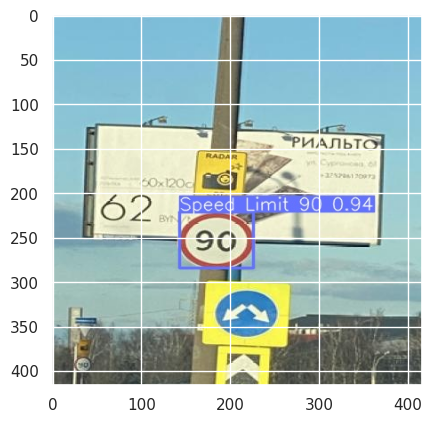

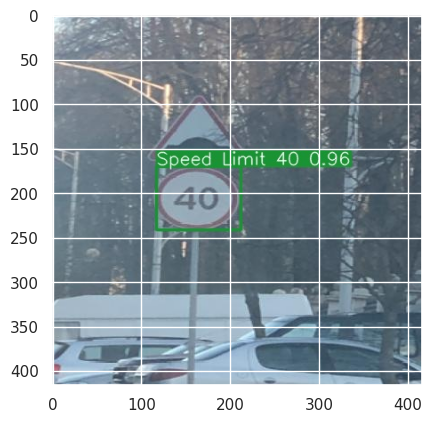

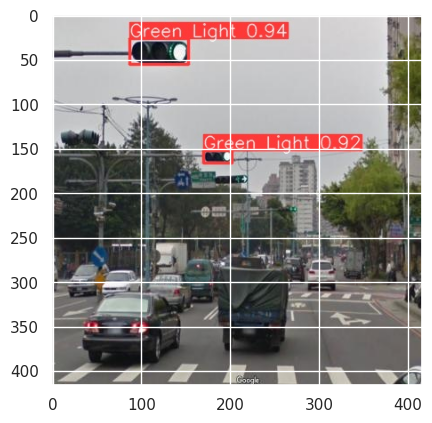

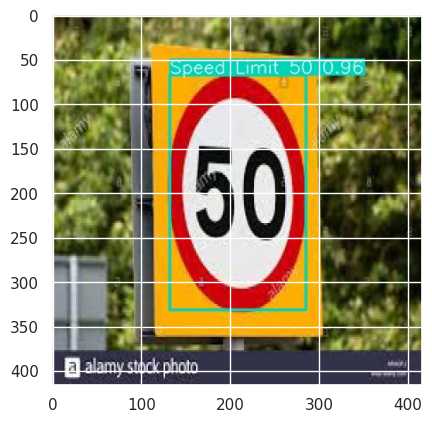

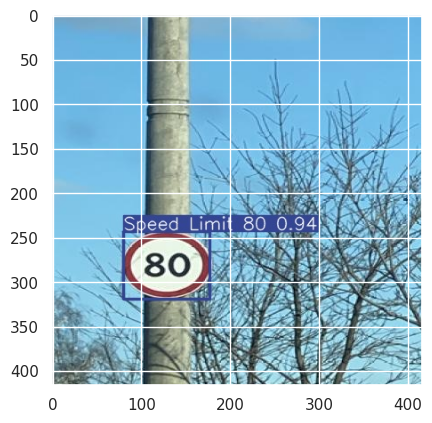

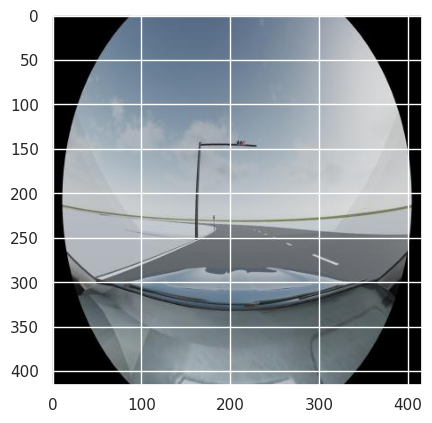

In [ ]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()

## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

**Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

In [ ]:
# Export the model
Valid_model.export(format='onnx')

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.30GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 19, 3549) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 80.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 11.8s, saved as '/content/runs/detect/train/weights/best.onnx' (11.6 MB)

Export complete (13.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=416  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=416 data=/

'/content/runs/detect/train/weights/best.onnx'

## <b>7 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs From Video  </b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.1 |</span></b> Show Original Video Before Detect </b></p>
</div>

**Tip: Due to the substantial volume of the video generated from the image dataset, I have to utilize only a truncated segment of the original video for this project.**

In [ ]:
# # Convert mp4
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
# !ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4

# # Display the video
# Video("output.mp4", width=960)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.2 |</span></b> Predict By Pr-Trained YOLOv8 </b></p>
</div>

In [ ]:
# Load a pr-trained model
video_model = YOLO("yolov8n.pt")
# Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')
# Use the model to detect signs
video_model.predict(source="/kaggle/input/cardetection/video.mp4", show=True, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/508) /kaggle/input/cardetection/video.mp4: 640x640 1 stop sign, 7.9ms
video 1/1 (2/508) /kaggle/input/cardetection/video.mp4: 640x640 1 stop sign, 7.8ms
video 1/1 (3/508) /kaggle/input/cardetection/video.mp4: 640x640 1 stop sign, 7.8ms
video 1/1 (4/508) /kaggle/input/cardetection/video.mp4: 640x640 (no detections), 7.8ms
video 1/1 (5/508) /kaggle/input/cardetection/v

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/video.avi result_out.mp4

# Display the video
Video("result_out.mp4", width=960)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Thank you for taking the time to review my notebook. If you have any questions or criticisms, please kindly let me know in the comments section.  </b></p>
</div>
